# **01. ABSTRACTO**
El dataset comprende valores de venta de propiedades en el estado de IOWA, USA. Contiene 79 variables explicativas que nos ayudan a describir la gran mayoría de los aspectos que pueden impactar en el precio.

Fue compilado por Dean De Cock para uso en educación de ciencia de datos.

La motivación del análisis a efectuar es desarrollar un modelo predictivo que permita obtener el valor de una propiedad en función de sus características principales.



###**01.01. Objetivo**
Identificar cuáles son las variables que alteran, modifican, o afectan de manera directa e indirecta en el valor de una propiedad en IOWA. Lograr entregar al cliente un modelo que permita colocar un precio acorde de venta a las propiedades a ofrecer.

###**01.02. Preguntas a resolver**

1 - ¿Hay alguna tendencia entre alguna de las calificaciones de las viviendas ('OverallCond' u 'OverallQual') y su precio de venta?

2 - ¿Puede identificarse alguna tendencia del precio de venta en función de la superficie del primer y segundo piso de la propiedad?

3 - ¿Qué papel juega el tipo de transacción con el que se adquirió la vivienda?

4 - ¿Qué zona de emplazamiento (MSZoning) es la más valorada por los compradores?

###**01.03. Contexto Comercial**
El mercado inmobiliario de Iowa, USA es de alta competencia. Las múltiples compañías que participan en el mismo se disputan por minimizar sus costos fijos en fuerza operativa. Las consultoras encargadas de tasar viviendas representan un costo del 5% del ingreso neto promedio.

###**01.04. Problema Comercial**
El cliente, inmobiliaria reconocida en Iowa, pretende aumentar su productividad y eficiencia en costos realizando una auditoría básica de sus propiedades en la que se zondeen ciertos parámetros que determinen la calidad de cada vivienda. En base a estos parámetros, propone desarrollar una API que permita a los tasadores obtener un valor estimativo de la propiedad.

#**02. EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os
from   scipy import stats
import statsmodels.formula.api as sm
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *



In [ ]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Coderhouse-DS/Argento-CaputoRoman_TrabajoFinal/TrabajoFinal_Datasets/House_prices'

df = pd.read_csv('train.csv',sep = ',').drop(columns = 'MSZoning')
df.head

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Coderhouse-DS/Argento-CaputoRoman_TrabajoFinal/TrabajoFinal_Datasets/House_prices


<bound method NDFrame.head of         Id  MSSubClass  LotFrontage  LotArea Street Alley LotShape  \
0        1          60         65.0     8450   Pave   NaN      Reg   
1        2          20         80.0     9600   Pave   NaN      Reg   
2        3          60         68.0    11250   Pave   NaN      IR1   
3        4          70         60.0     9550   Pave   NaN      IR1   
4        5          60         84.0    14260   Pave   NaN      IR1   
...    ...         ...          ...      ...    ...   ...      ...   
1455  1456          60         62.0     7917   Pave   NaN      Reg   
1456  1457          20         85.0    13175   Pave   NaN      Reg   
1457  1458          70         66.0     9042   Pave   NaN      Reg   
1458  1459          20         68.0     9717   Pave   NaN      Reg   
1459  1460          20         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeck

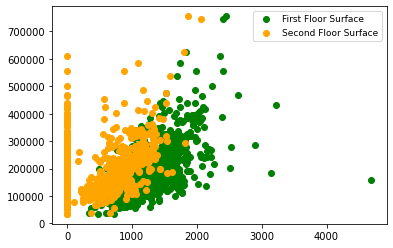

In [ ]:
# Se grafica en matplotlib la relación entre área de primer piso y segundo piso y el precio de la propiedad

plt.scatter(df['1stFlrSF'], df['SalePrice'], color='green', label="First Floor Surface")
plt.scatter(df['2ndFlrSF'], df['SalePrice'], color='orange', label="Second Floor Surface")
plt.legend(loc='best', facecolor='w', fontsize=9)

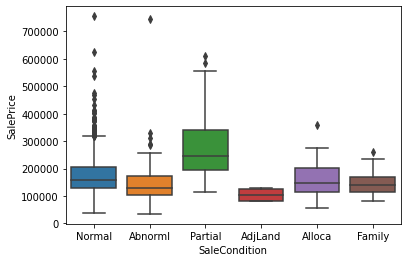

In [ ]:
# ¿Cómo es la distribución del precio de las propiedades en función del tipo de transacción?

Price_vs_SaleCond = sns.boxplot(x="SaleCondition", y="SalePrice", data=df)

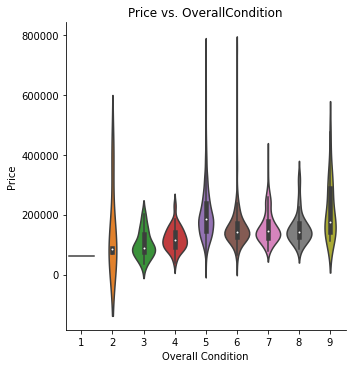

In [ ]:
# ¿Cómo es la distribución del precio de las propiedades en función de su condición general?

ax = sns.catplot(data=df, kind='violin', x='OverallCond', y='SalePrice', split=True)
ax.set(xlabel='Overall Condition', ylabel='Price', title='Price vs. OverallCondition')

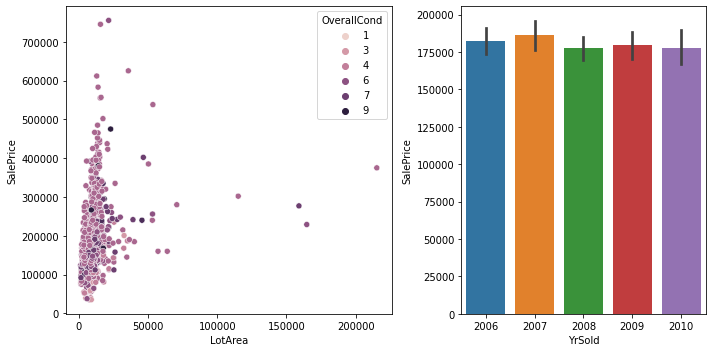

In [ ]:
# ¿Hay alguna relación entre el año de venta o el área del lote con el precio de venta? - Gráficos en Seaborn con axeslevels en matplotlib

f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="LotArea", y="SalePrice", hue="OverallCond", ax=axs[0])
sns.barplot(data=df, x="YrSold", y="SalePrice", ax=axs[1]); f.tight_layout()


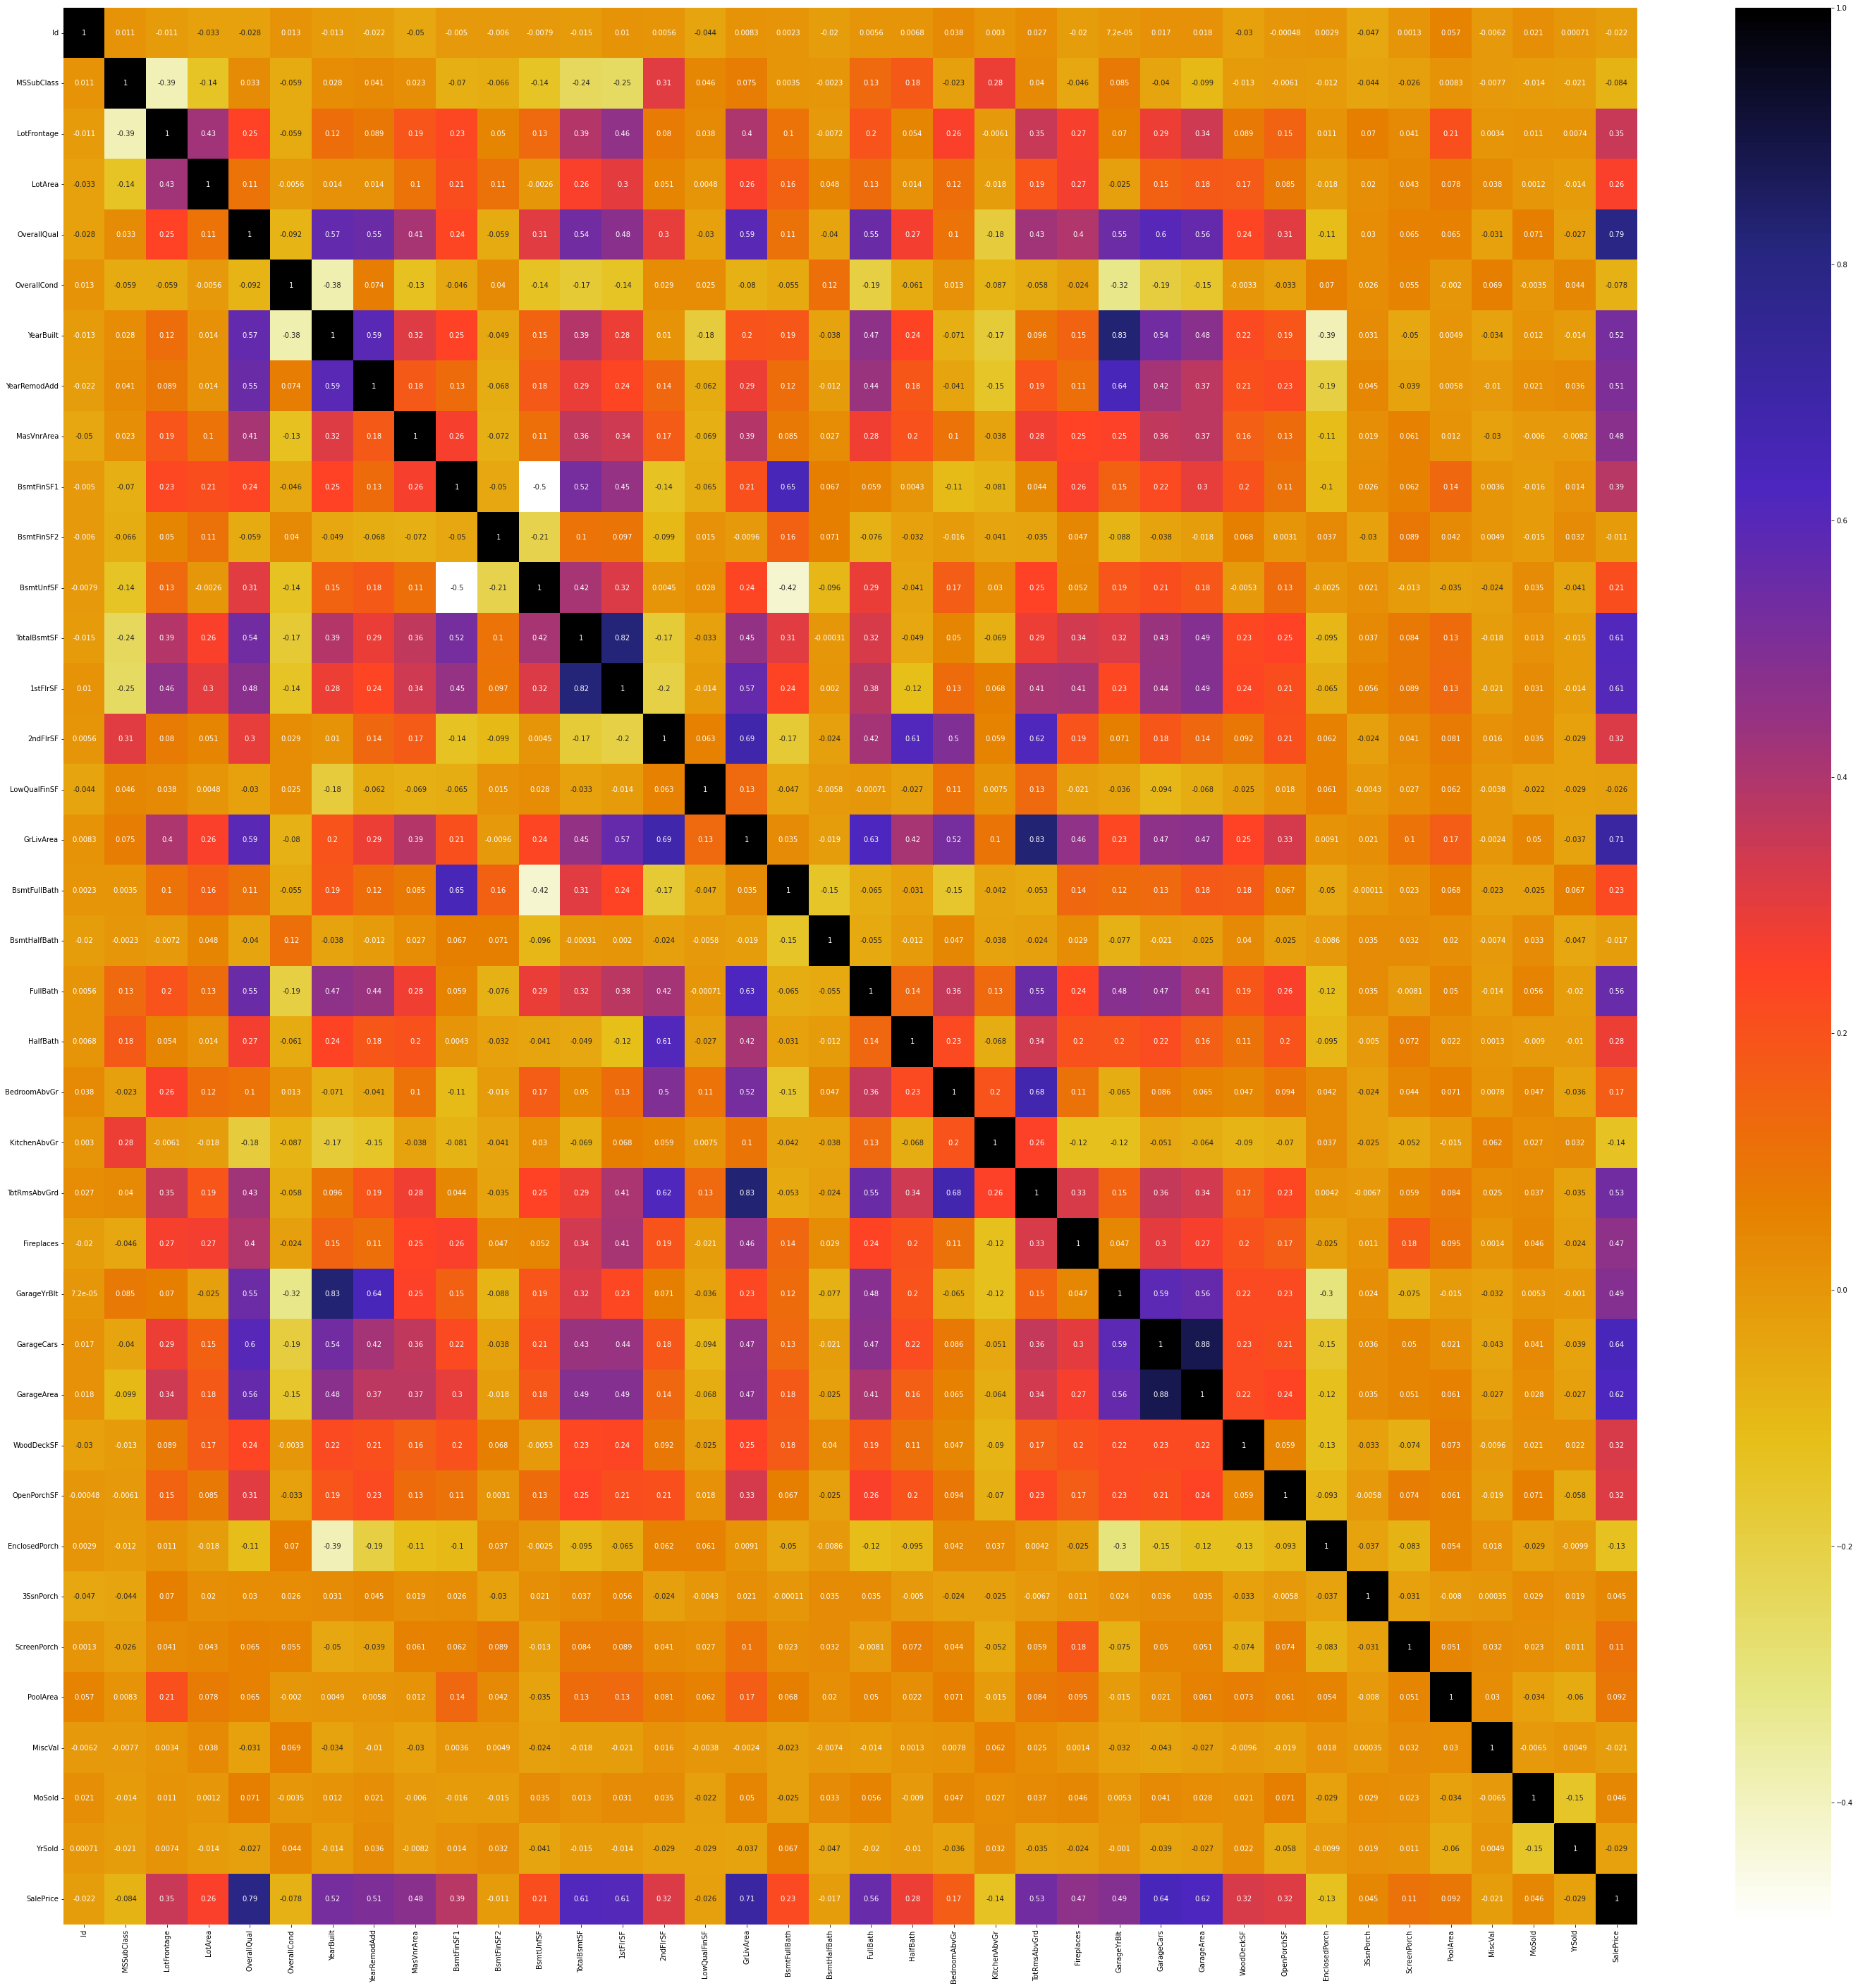

In [ ]:
#Armamos un heatmap para determinar la correlación entre variables - Principalmente, queremos definir qué porcentaje de la varianza de 'saleprice' explica cada atributo. 

cor = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

In [ ]:
#Se identifican como principales variables que explican la varianza de 'saleprice' a: 'OverallQual' y 'GrLivArea'. 

## Pasamos a calcular exactamente qué porción de la varianza de 'SalePrice' explica cada uno de estos atributos previamente seleccionados.

### Probar con RFECV SelectKBest y f_regression


### En el heatmap puede verse que la superficie del piso 1 explica el .61 de la varianza del precio de venta, mientras la del segundo piso un .32 / Complementando ambas variables obtendremos un valor de superficie que copiará mejor su impacto en el valor de venta:

df['TotalSF'] = df['1stFlrSF']+df['2ndFlrSF']

data= df[['OverallQual','GrLivArea','SalePrice', 'GarageCars','GarageArea', 'TotalBsmtSF', 'TotalSF']]
data.head()

,OverallQual,GrLivArea,SalePrice,GarageCars,GarageArea,TotalBsmtSF,TotalSF
0,7,1710,208500,2,548,856,1710
1,6,1262,181500,2,460,1262,1262
2,7,1786,223500,2,608,920,1786
3,7,1717,140000,3,642,756,1717
4,8,2198,250000,3,836,1145,2198


In [ ]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in data.columns:
  if col == 'Symbol':
    pass
  else:
    data[col] = min_max_scaling(data[col])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,OverallQual,GrLivArea,SalePrice,GarageCars,GarageArea,TotalBsmtSF,TotalSF
0,0.666667,0.259231,0.241078,0.50,0.386460,0.140098,0.259231
1,0.555556,0.174830,0.203583,0.50,0.324401,0.206547,0.174830
2,0.666667,0.273549,0.261908,0.50,0.428773,0.150573,0.273549
3,0.666667,0.260550,0.145952,0.75,0.452750,0.123732,0.260550
4,0.777778,0.351168,0.298709,0.75,0.589563,0.187398,0.351168


In [ ]:
model1 = 'SalePrice~TotalSF+OverallQual+GrLivArea+TotalBsmtSF+GarageArea'
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     914.5
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:15:41   Log-Likelihood:                 2185.2
No. Observations:                1460   AIC:                            -4358.
Df Residuals:                    1454   BIC:                            -4327.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1302      0.005    -23.723      

Con las variables seleccionadas se explica el 75,9% de la varianza

In [ ]:
model1 = 'SalePrice~GrLivArea'
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          4.52e-223
Time:                        22:15:41   Log-Likelihood:                 1656.4
No. Observations:                1460   AIC:                            -3309.
Df Residuals:                    1458   BIC:                            -3298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0270      0.005      5.385      0.0

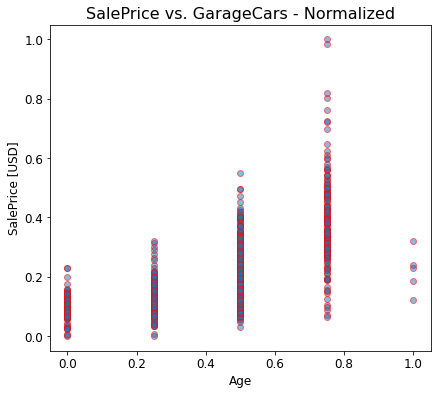

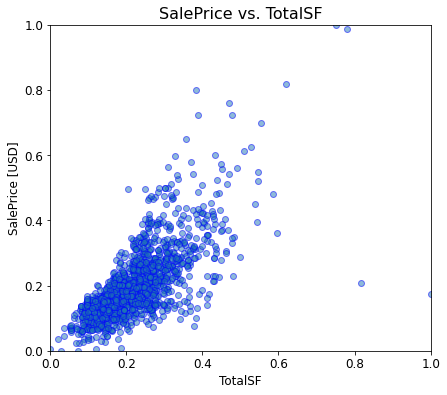

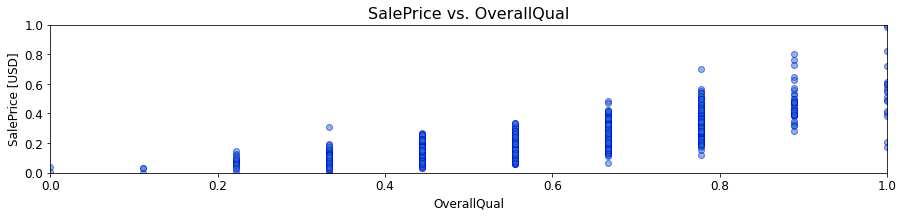

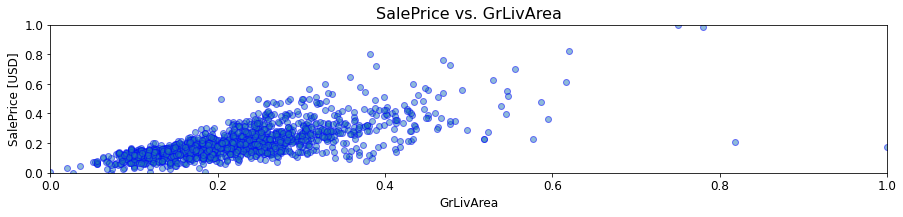

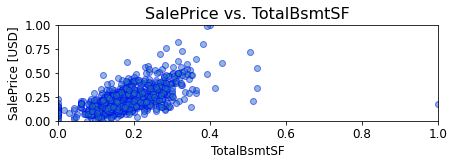

In [ ]:
plt.figure(figsize=(15,6))

# SalePrice vs. GarageCars - Normalizados
plt.subplot(121)
plt.scatter(data['GarageCars'], data['SalePrice'], edgecolor='r', alpha=0.5)
#plt.xlim(-0.05, 1.05)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
#plt.ylim(-0.05, 1.05)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. GarageCars - Normalized', fontsize=16)

# SalePrice vs TotalSF - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(122)
plt.scatter(data['TotalSF'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('TotalSF', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. TotalSF', fontsize=16)
plt.show()

# SalePrice vs OverallQual - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(212)
plt.scatter(data['OverallQual'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('OverallQual', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. OverallQual', fontsize=16)
plt.show()

# SalePrice vs GrLivArea - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(212)
plt.scatter(data['GrLivArea'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('GrLivArea', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. GrLivArea', fontsize=16)
plt.show()

# SalePrice vs TotalBsmtSF - Normalizados
plt.figure(figsize=(15,6))
plt.subplot(325)
plt.scatter(data['TotalBsmtSF'], data['SalePrice'], edgecolor='b', alpha=0.5)
plt.xlim(0, 1)
plt.xlabel('TotalBsmtSF', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('SalePrice [USD]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('SalePrice vs. TotalBsmtSF', fontsize=16)
plt.show()

In [ ]:
# Antes de armar el modelo predictivo, corroboramos que las features elegidas no cuentan con valores nulos

data.isnull().sum()

OverallQual    0
GrLivArea      0
SalePrice      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
TotalSF        0
dtype: int64

In [ ]:
# Preparamos los valores de "X" y de "Y" para el modelo de regresión

data_X = data.drop(columns = 'SalePrice')
data_y = df['SalePrice'] # En este caso uso el dataframe original porque quiero predecir el valor exacto, no me interesa la variable normalizada

In [ ]:
data_X


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,TotalSF
0,0.666667,0.259231,0.50,0.386460,0.140098,0.259231
1,0.555556,0.174830,0.50,0.324401,0.206547,0.174830
2,0.666667,0.273549,0.50,0.428773,0.150573,0.273549
3,0.666667,0.260550,0.75,0.452750,0.123732,0.260550
4,0.777778,0.351168,0.75,0.589563,0.187398,0.351168
...,...,...,...,...,...,...
1455,0.555556,0.247362,0.50,0.324401,0.155974,0.247362
1456,0.555556,0.327619,0.50,0.352609,0.252373,0.327619
1457,0.666667,0.377920,0.25,0.177715,0.188543,0.377920
1458,0.444444,0.140166,0.25,0.169252,0.176432,0.140166


In [ ]:
data_y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.15)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
c = lr.intercept_
print("c=", c)
m = lr.coef_
print("m=", m)

c= -57215.6008174461
m= [212792.70254693  -5946.02871564  53312.9334873   27473.2292956
 178641.85054818 248383.07155244]


In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([149957.43795734, 184198.25131168,  86814.19276515, ...,
       284825.91945664, 122197.75800186, 311423.15410578])

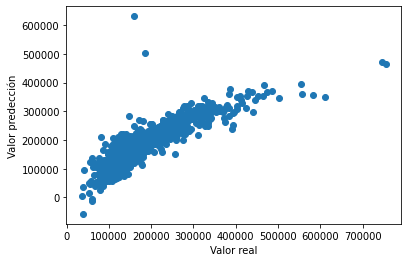

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Valor real")
plt.ylabel("Valor predección")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)


0.7507789466528205

Las predicciones de precios de venta de las propiedades se ajustan en un 75,08% a los valores reales de las mismas. Se trata de un modelo aceptable para predecir dichos valores. 

In [ ]:
#Cambiamos el método de feature selection por forward selection para ver cómo performa la predicción

##Completamos los valores nulos cambiándolos por la mediana de la columna para evitar mayores errores en la predicción

df = df.fillna(df.median())

In [ ]:
## Excluimos el dtype object ya que de otra forma no funciona el modelo de forward selection


df = df.select_dtypes(exclude=['object'])

## Normalizamos los datos, esta vez para el dataframe con todas sus columnas

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in df.columns:
  if col == 'Symbol':
    pass
  else:
    df[col] = min_max_scaling(df[col])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [ ]:
## Establecemos los valores de X e y para hacer una selección sobre cómo los valores afectan al atributo SalePrice

df_X = df.drop(columns = 'SalePrice')
df_y = df['SalePrice'] 

In [ ]:
## Script para la función forward selection:

import statsmodels.api as sm
def forward_selection(df, target, significance_level=0.05):
    initial_features = df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(df_X, df_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

['OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageCars',
 'MSSubClass',
 'YearBuilt',
 'BedroomAbvGr',
 'OverallCond',
 'LotArea',
 'MasVnrArea',
 'BsmtFullBath',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'ScreenPorch',
 'TotalBsmtSF',
 'YearRemodAdd']

In [ ]:
# Rehacemos el dataset de entrenamiento con estas nuevas columnas

df_fs_columns = ['OverallQual','GrLivArea','BsmtFinSF1','GarageCars','MSSubClass','YearBuilt','BedroomAbvGr','OverallCond','LotArea','MasVnrArea','BsmtFullBath','TotRmsAbvGrd','WoodDeckSF','ScreenPorch','TotalBsmtSF','YearRemodAdd']

df_X_fs = df[df_fs_columns]

In [ ]:
## Volvemos a entrenar el modelo, esta vez usando las columnas seleccionadas con forward selection

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X_fs, df_y, test_size = 0.15)

In [ ]:
lr.fit(X_train, y_train)
c = lr.intercept_
print("c=", c)
m = lr.coef_
print("m=", m)

c= -0.12612969735496685
m= [ 0.23274155  0.38360031  0.0930423   0.06096923 -0.04691716  0.0595346
 -0.11228775  0.04442483  0.13148499  0.06966488  0.0357376   0.059582
  0.03435682  0.03539662  0.04526959  0.0165515 ]


In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0.13037111, 0.25591166, 0.23991357, ..., 0.34850603, 0.01446562,
       0.05914134])

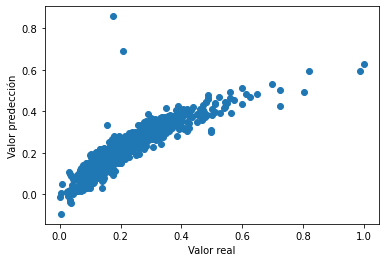

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Valor real")
plt.ylabel("Valor predección")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.8075843245161577

Mediante el método manual de selección de atributos habíamos obtenido un 75,08% de precisión en la predicción de datos. Utilizando el cambio el método de feature selection **forward selection** obtenemos un **80,76%**. Esto se traduce en un modelo que explica mejor la varianza del dataset. 